### Lead Scoring Case Study

#### PROBLEM STATEMENT : X Education, An education company sells online courses to industry professionals. Company Uses various Marketing platforms, with which people land on their website, by filling up a form, these people gets converted to leads another source of leads is through past referrals. Major issue here is of Lead conversion i.e to predict the leads that are most likely to convert into paying customers.  

#### OBJECTIVE : Build a Logistic Regression model and assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. 

#### Target lead conversion rate is around 80%.

#### STEP 1 - IMPORTING AND INSPECTING DATA  

In [1]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
# TO SUPRESS WARNINGS 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# IMPORTING AND INSPECTING THE DATA

leads= pd.read_csv("Leads.csv")

# DISPLAY ALL VARIABLES AND TOP 3 ROWS

pd.options.display.max_columns = None
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [4]:
# SHAPE OF DATA SET- 9,240 ROWS AND 37 VARIABLES

leads.shape

(9240, 37)

In [5]:
# STATISTICAL SUMMARY OF NUMERICAL FEATURES

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# CHECKING DATATYPES  and NOT NULL COUNT 

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### STEP 2 - DATA CLEANING

In [7]:
# MISSING DATA PERCENTAGE WISE

round(leads.isnull().sum() * 100 / len(leads),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [8]:
# CHECKING FOR DULPICATES

leads_dup = leads.loc[leads.duplicated()]
leads_dup

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### 2.1.TREATING DATA

Dropping Prospect ID and Lead Number as these are all unique variables showing distninct values, and will not add anything to analysis.

Column 'Specialization','How did you hear about X Education','Lead Profile' and 'City' have 'Select' level. Which means the customer had not selected option while filling form. So imputing 'select' with 'Null' values

In [9]:
# COLUMNS HAVING 'SELECT' AS AN OBSERVATION

col = list(leads.columns)
for i in col:
    if 'Select' in leads[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


Here 'Select' infers that customers have not shared such information with us. 

In [10]:
# Imputing 'Select' values with np.nan

leads= leads.replace('Select', np.nan)

In [11]:
# CHECKING AGAIN FOR COLUMNS HAVING 'SELECT' AS AN OBSERVATION

col = list(leads.columns)
for i in col:
    if 'Select' in leads[i].values:
        print(i)
        

In [12]:
# AGAIN CHECKING MISSING DATA PERCENTAGE WISE

round(leads.isnull().sum() * 100 / len(leads),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

'How did you hear about X Education' and 'Lead Profile' has most missing values almost 80%, it would be misleading to impute such values with mode or any other value. Hence, it is only imperative to drop it. Similarly, we also drop variables such as - "Lead Quality", "Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Activity Index", "Asymmetrique Profile Index".

In [13]:
# DROPPING VARIABLES HAVING MISSING VALUE> 40%

leads = leads.loc[:, round(leads.isnull().sum() * 100 / len(leads),2)< 40 ]
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened


In [14]:
# UNIQUE IDENTIFIERS IN "leads" 

drop_unique_identifier= ['Lead Number','Prospect ID']

In [15]:
# DROPPING 'Lead Number' & 'Prospect ID' AS IT WILL NOT BE USEFUL IN ANALYSIS AND PREDICTION

leads = leads.drop(drop_unique_identifier, axis=1)

# SHAPE OF DATAFRAME

leads.shape

(9240, 28)

In [16]:
# AGAIN CHECKING MISSING DATA 

round(leads.isnull().sum() * 100 / len(leads),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

#### 2.2.IMPUTING CATEGORICAL VARIABLES

In [17]:
# CHECKING VALUE COUNTS FOR ALL CATEGORICAL FEATURES

for col in leads:
    print(leads[col].astype('category').value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Do Not Email
No     8506
Yes     734
N

* INTERPRETATION-
So we drop below fields due to extreme skewness/ single records in values/ Unique values:

1. Do Not Call
2. What matters most to you in choosing a course
3. Search
4. Magazine
5. Newspaper Article
6. X Education Forums
7. Newspaper
8. Digital Advertisement
9. Through Recommendations
10. Receive More Updates About Our Courses
11. Update me on Supply Chain Content
12. I agree to pay the amount through cheque
13. Do Not Email
14. Country

In [18]:
# DROPPING COLUMNS BASIS HIGH SKEWNESS OR SINGLE VALUE COLUMN 

drop_col= ['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'I agree to pay the amount through cheque','Do Not Email','Country','Get updates on DM Content']

In [19]:
# DROPPING ABOVE MENTIONED COLUMNS AND CHECKING SHAPE

leads= leads.drop(drop_col, axis=1)
leads.shape

(9240, 13)

INFERENCE :
1. "Google" and "google" will be clubbed together.
2. Due to low count clubbing all points with values less than 500 to "others".
3. Imputing missing value with mode. 

In [20]:
# NAME CORRECTION

leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

# IMPUTING 'Lead Source' MISSING VALUES WITH MODE

leads['Lead Source'] = leads['Lead Source'].fillna( leads['Lead Source'].mode()[0])

# clubbing all points in 'Lead Source' with values less than 500 to "others"

leads['Lead Source'] = leads['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','Click2call','Social Media',
                                                     'Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn',
                                                    'welearnblog_Home','youtubechannel','testone','NC_EDM'], 'others')

Clearly, its much better now in numbers, as as whole also "others" contributes to 3.7% as a whole.

In [21]:
# IMPUTING MISSING VALUES IN 'Last Activity' WITH 'others'

leads['Last Activity'].fillna("others", inplace= True)

# CLUBBING VALUES LESS THAN 100 IN 'others'

leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                         'View in browser link Clicked','Email Received','Email Marked Spam',
                                                         'Visited Booth in Tradeshow','Resubscribed to emails'],"others")

In [22]:
# IMPUTING MISSING VALUES IN Specialization WITH "others" also clubbing values <=100 to "others"

leads.Specialization = leads.Specialization.replace([np.nan, 'Retail Management','Rural and Agribusiness','E-Business','Services Excellence'], "others")

In [23]:
# RENAMING "What is your current occupation" TO 'occupation'

leads= leads.rename(columns={'What is your current occupation':'occupation'})

In [24]:
# IMPUTING MISSING VALUES in occupation TO 'Other' as we don't want to drop 29% data here. 

leads.occupation = leads.occupation.replace([np.nan], "Other")

In [25]:
# IMPUTING MISSING VALUES IN "TAGS" WITH 'others'; ALSO CLUBBING VALUES

leads.Tags = leads.Tags.replace([np.nan, 'switched off', 'Busy', 'Lost to EINS', 'Not doing further education',
       'Interested  in full time MBA', 'Graduation in progress',
       'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given',
       'opp hangup', 'number not provided', 'in touch with EINS',
       'Lost to Others', 'Still Thinking',
       'Want to take admission but has financial problems',
       'In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'Shall take in the next coming month',
       'University not recognized', 'Recognition issue (DEC approval)'], "others")

In [26]:
# IMPUTING MISSING VALUES AND VALUES LESS THAN 5% in "City" TO 'Other Cities'

leads.City = leads.City.replace([np.nan,'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'],"Other Cities")

#### 2.3.IMPUTING NUMERICAL VARIABLES

In [27]:
# CHECKING "TotalVisits" STATISTICAL VALUES

leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


--> TotalVisits has some outlier values, so imputing TotalVisits missing values with median value.


In [28]:
# IMPUTING TotalVisits MISSING VALUES WITH MEDIAN VALUE

leads.TotalVisits = leads.TotalVisits.replace([np.nan], leads.TotalVisits.median())

In [29]:
# AGAIN CHECKING MISSING DATA 

round(leads.isnull().sum() * 100 / len(leads),2).sort_values(ascending=False)

Page Views Per Visit                      1.48
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
occupation                                0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [30]:
# CHEKING VALUES IN 'Page Views Per Visit'

leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

'Page Views Per Visit' has some outlier values, hence imputing missing values with median

In [31]:
# IMPUTING 'Page Views Per Visit' MISSING VALUES WITH MEDIAN

leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace([np.nan], leads['Page Views Per Visit'].median())

In [32]:
# CHECKING ALL DATA ONCE MORE

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   occupation                              9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

### STEP 3 - EDA

#### 3.1.UNIVARIATE & BIVARIATE ANALYSIS

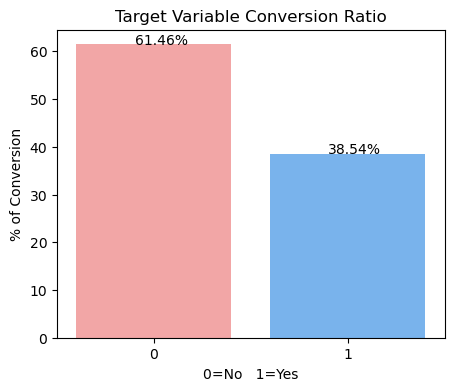

In [33]:
# CHECKING CONVERSION RATIO OF TARGET COLUMN

plt.figure(figsize=(5, 4))
ax=sns.barplot(x='Converted', y='Converted', data=leads, estimator=lambda x: len(x) / len(leads) * 100, palette=["#ff9999", "#66b3ff"])
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
plt.title('Target Variable Conversion Ratio')
plt.xlabel('0=No   1=Yes')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

Current conversion percentage is 38.54% 

In [34]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   occupation                              9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

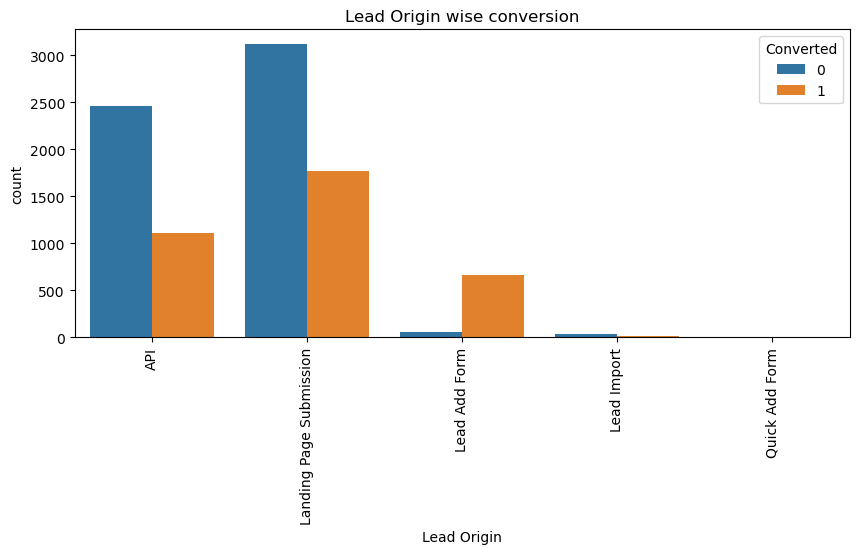

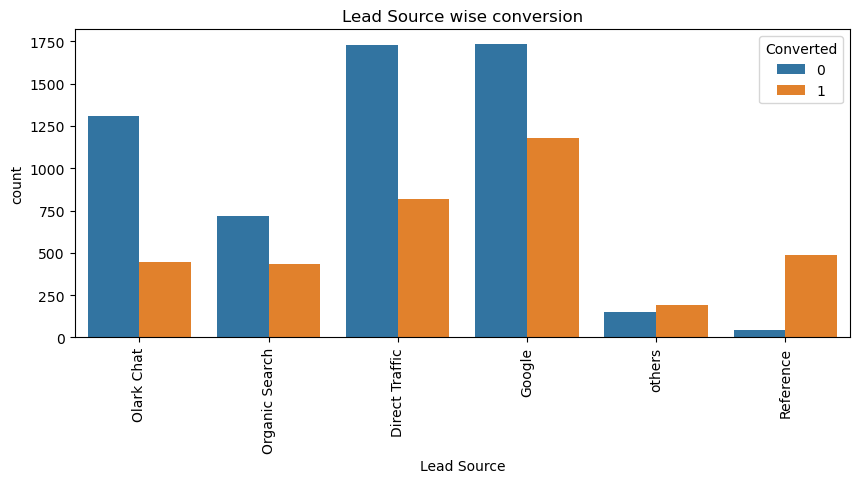

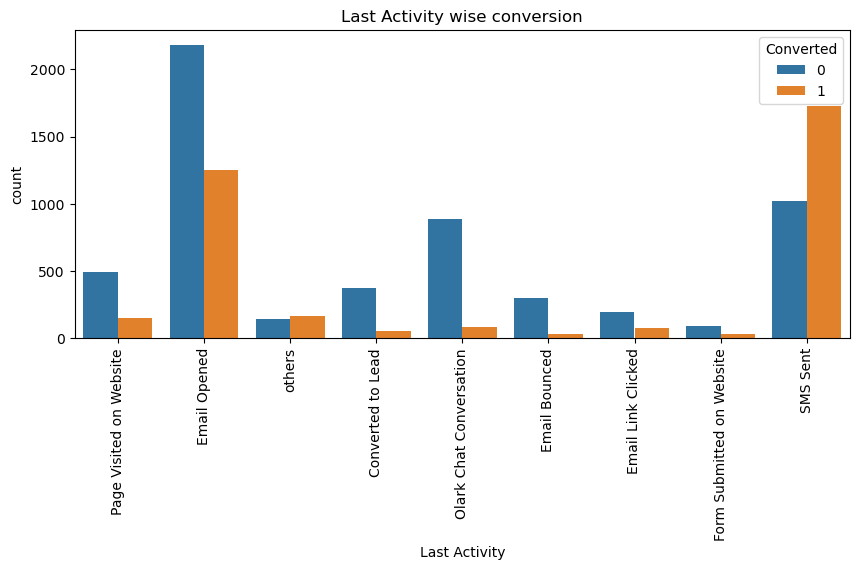

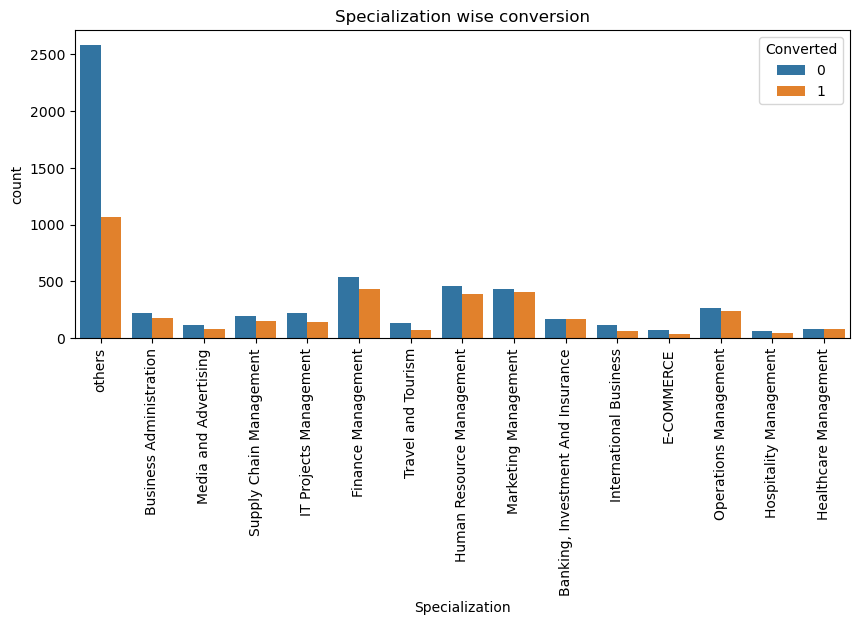

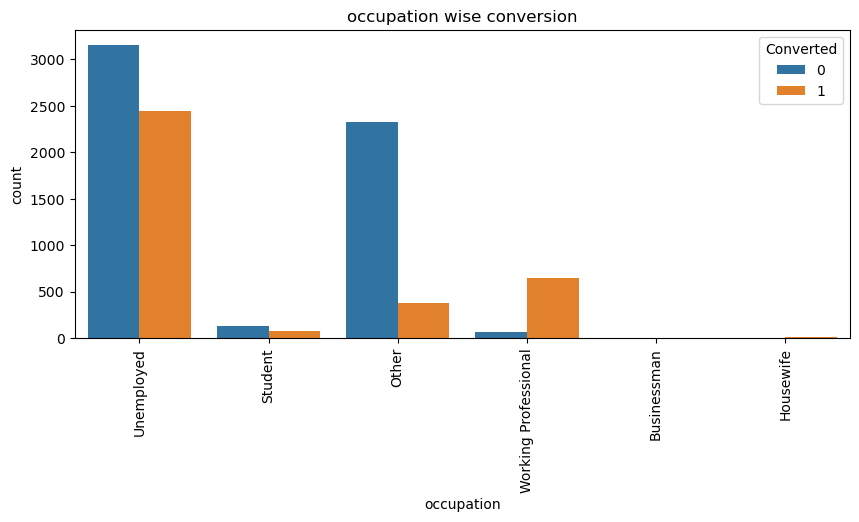

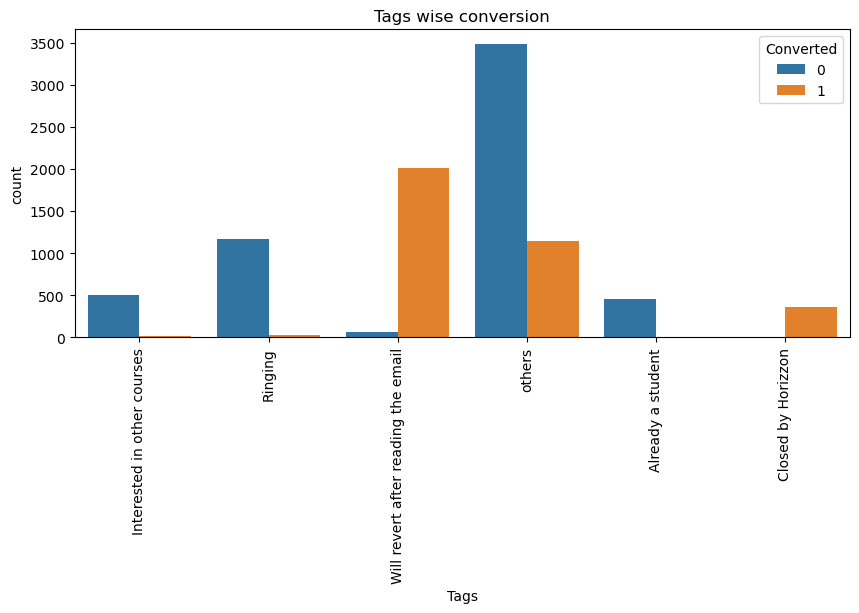

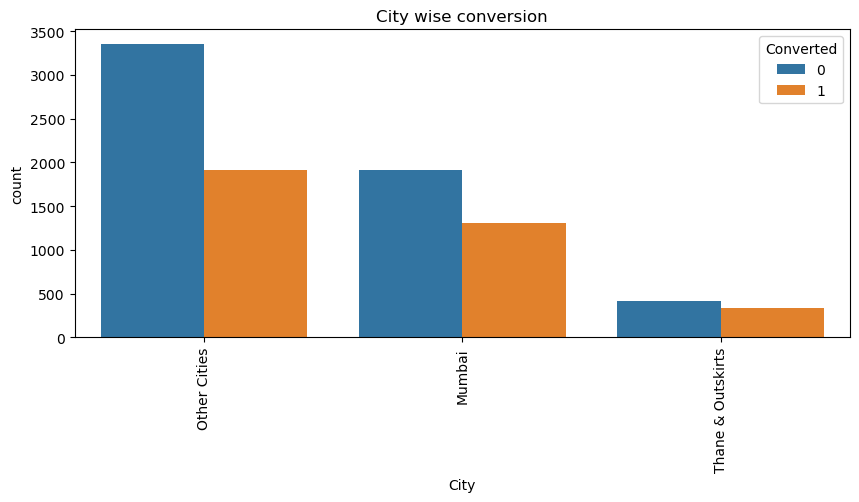

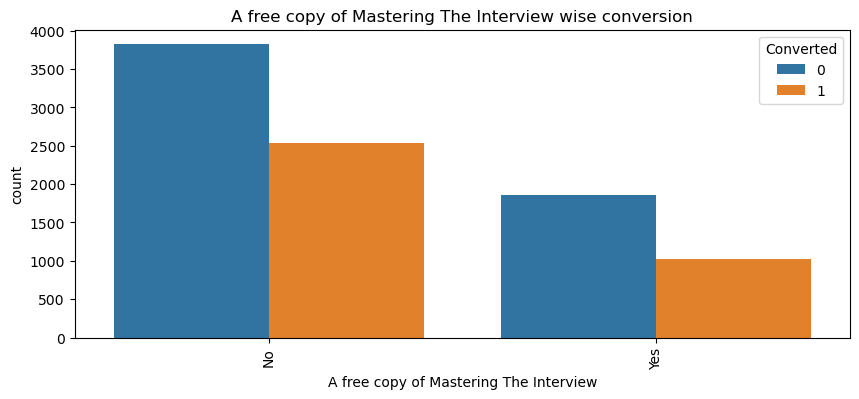

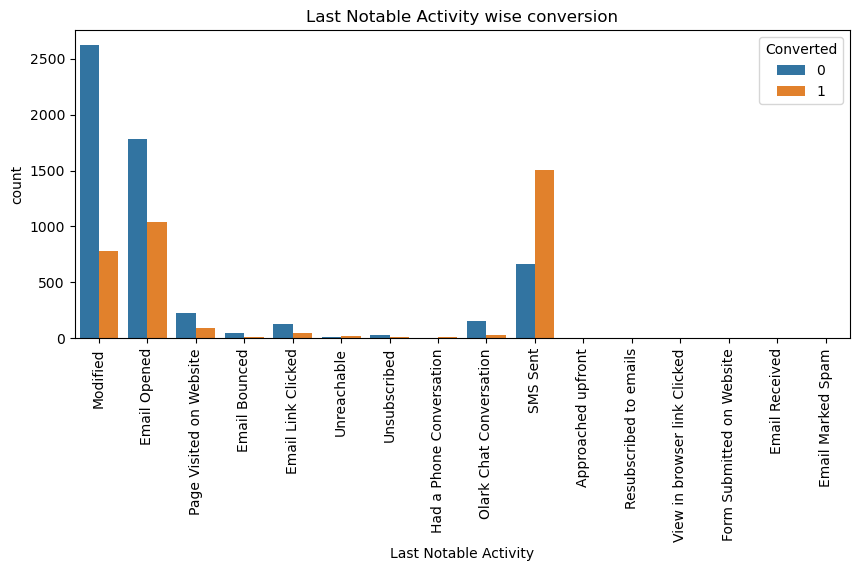

In [35]:
# VISULAISING ALL CATEGORICAL COLUMNS

cat_columns = leads.select_dtypes(include="object").columns
for col in cat_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue="Converted", data =leads)
    plt.xticks(rotation=90)
    plt.title(col+' '+'wise conversion')
    plt.xlabel(col)
    plt.show()
    

INFERENCE:

1. Lead Origin : Most Potential conversions are through API, Landing Page Submission and Lead Add form, but that's also because these 3 have most responses also, so here we can say getting a huge responses is a natural way of more conversions. Lead Import and Quick Add From have less conversion.
2. Lead source : Lead sources through Google, followed by Direct Traffic and Refrences leads to maximum conversions. Whereas Welingak and Reference are having more conversion rate and can be further optimised with more focus. 
3. Last Activity : SMS sent followed by Email opened has most conversions, but contrary to that email opened also has negative reponses as well so, right now its hard to call it a reliable Last Activity for conversions. Olark chat is not giving any significant returns.
4. Specialization : Individuals from Finance, HR and Marketing backgrounds have most conversions, but people from various other backgrounds can also be observed.
5. Occupation :  Unemployed Individuals and working professionals, show high conversions as compared to other catgories.
6. Tags : Individuals tagged as 'will revert after reading email' have highest positive reponse rate, followed by others and closed by Horizzon.
7. City : Not much of a trend observed but Thane and Outskirts have lowest conversion, but this is due to low leads from this region.
8. A free copy of Mastering the interview : More leads are from those who do not ask for free copy of Mastering Interviews and can be focused for conversion.
9. Last Notable activity : SMS sent, followed by Email opened and Modified show most conversions.

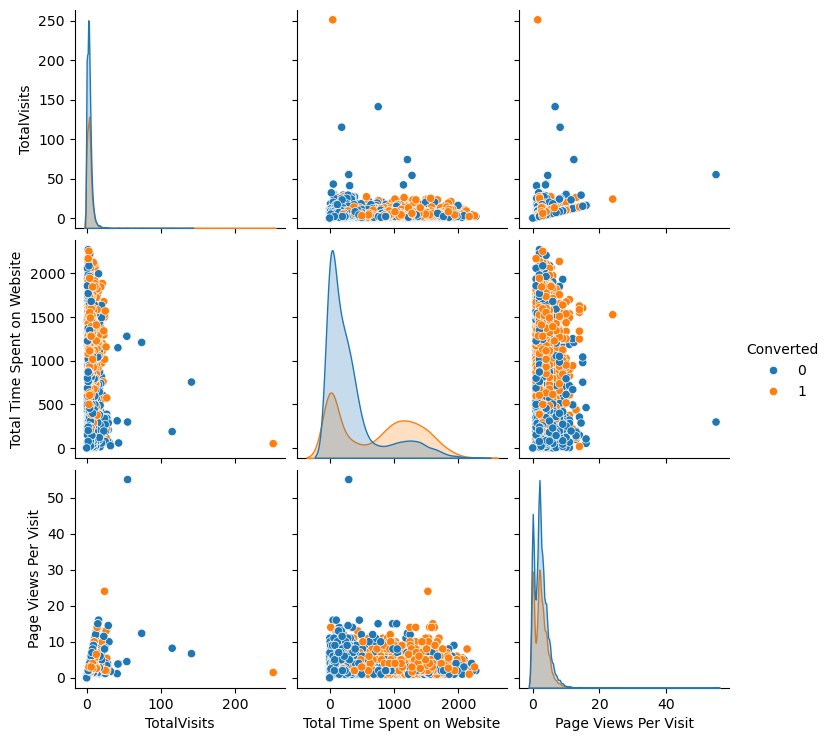

In [36]:
# VISULAIZING NUMERICAL COLUMNS USING A PAIRPLOT

num_columnns = leads.select_dtypes("number").columns
sns.pairplot(leads[num_columnns], hue="Converted" )
plt.show()

#### INFERENCE
1. TotalVisits vs Page Views Per Visit : Users with higher numbers of visits (outliers in the TotalVisits column) are mostly non-converted (blue), suggesting that having many visits does not necessarily correlate with conversion. In contrast, converted users (orange) are mostly concentrated at lower visit counts.
2. Total Time Spent on Website vs Page Views Per Visit : This suggests that users who convert often spend more time on the website, even if they don’t view many pages per visit. Non-converted users (blue) seem to spend less time on the website on average, which may indicate that insufficient engagement or lower interest leads to fewer conversions.
3. The converted group (orange) has a larger proportion of users spending significant time on the website with relatively fewer visits, suggesting that fewer but more engaged visits are associated with higher conversion rates. Non-converted users (blue) include outliers with both high visit counts and low time spent, indicating that frequent but short visits are less likely to result in conversion.

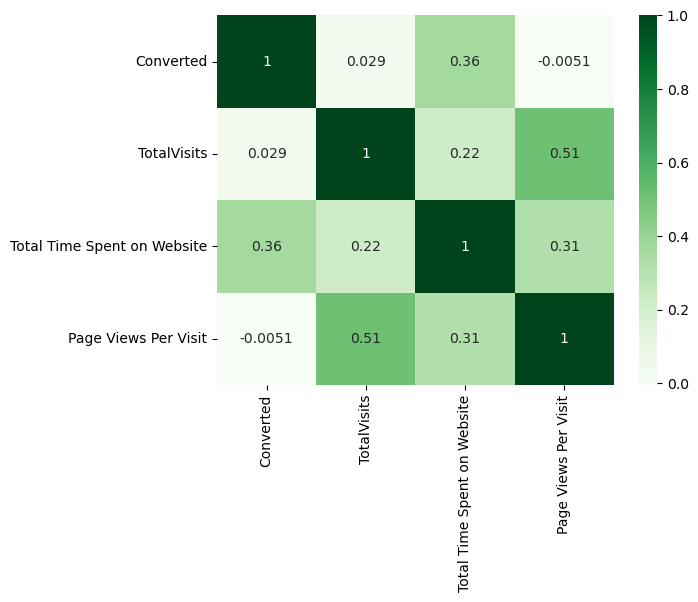

In [37]:
# CREATING A HEATMAP TO CHECK CORRELATION BETWEEN NUMERICAL VARIABLES

sns.heatmap(leads[num_columnns].corr(), annot=True, cmap= "Greens")
plt.show()

#### INFERENCES
1. Conversions has a negative correlation with Page Views per visit, conversion increases with less no of pages viewed per visit; it indicates that individuals more focused in a course might not explore many courses but stick to ones they are interested in. 
2. Total visit and Page views per visit shows a positive moderate correlation.
3. Converted has good correlation with Total time spent on Website.

#### 3.2.OUTLIER TREATMENT

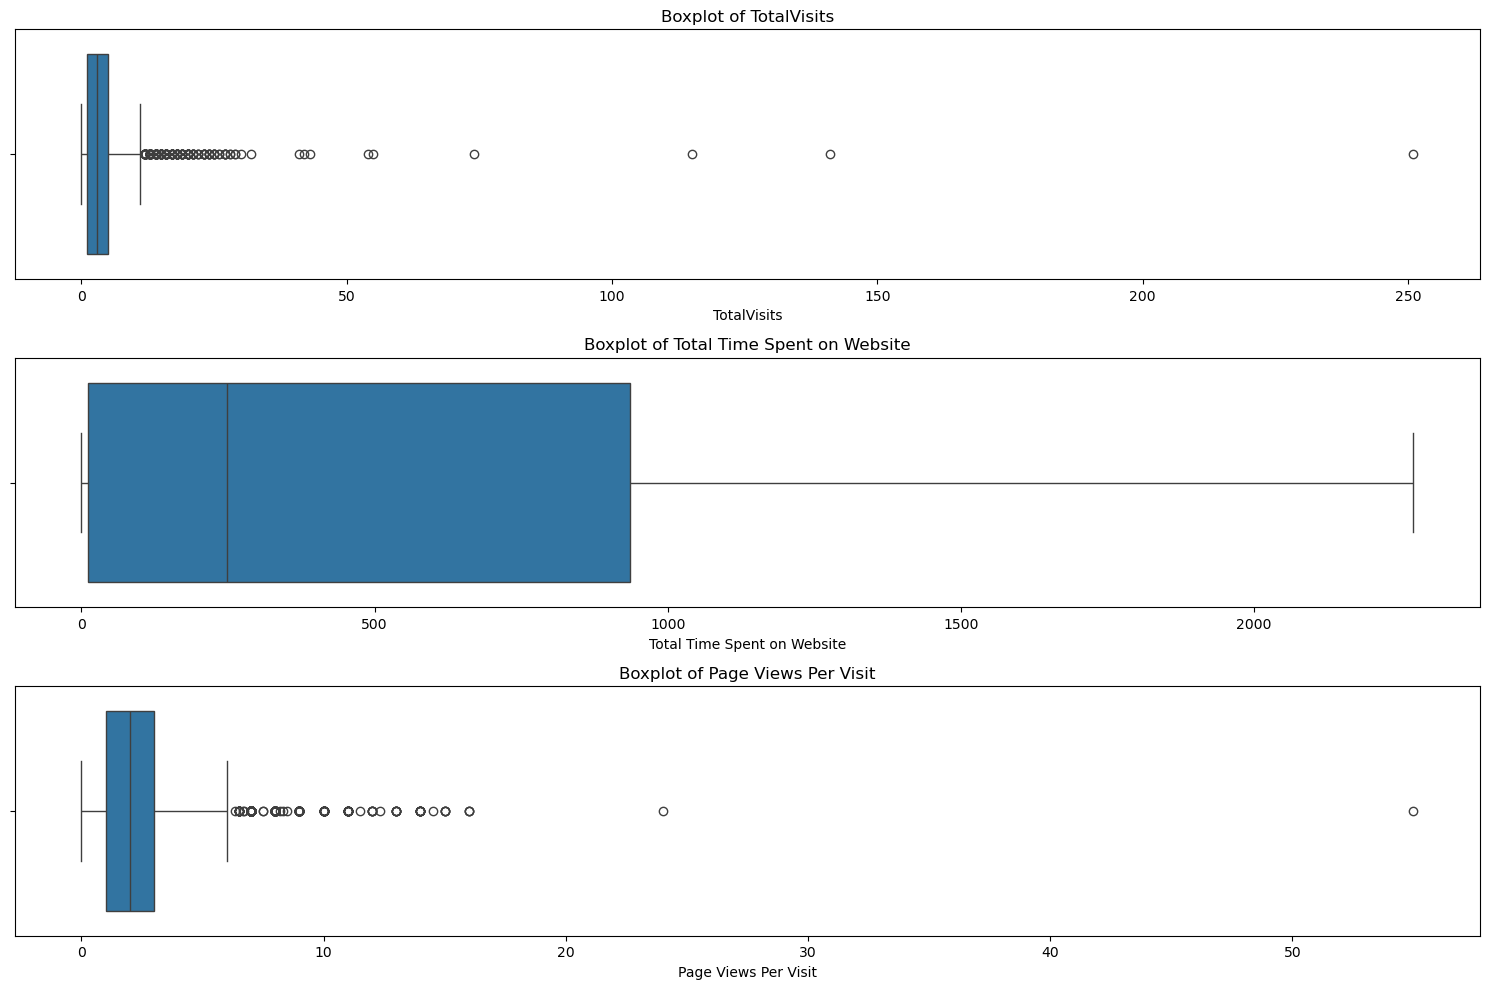

In [38]:
num_columnns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Set figure size
plt.figure(figsize=(15, 10))

# Loop through the numerical variables and create boxplots
for i, var in enumerate(num_columnns):
    plt.subplot(3, 1, i+1)  
    sns.boxplot(x=leads[var])  
    plt.title(f'Boxplot of {var}')  
plt.tight_layout()
plt.show()

In [39]:
leads[num_columnns].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000


* From the boxplots, we can see that there are outliers present in the variables.
* 'TotalVisits' - 95% is 10 and max value is 251, So we will cap these values at 10.
* No Outliers in 'Total Time Spent on Website'.
* 'Page Views Per Visit', we cap values at 95% percentile. 

In [40]:
percentile = leads['TotalVisits'].quantile([0.95]).values
percentile

array([10.])

In [41]:
# OUTLIER TREATMENT

percentile = leads['TotalVisits'].quantile([0.95]).values
leads['TotalVisits'][leads['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = leads['Page Views Per Visit'].quantile([0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentile[0]] = percentile[0]

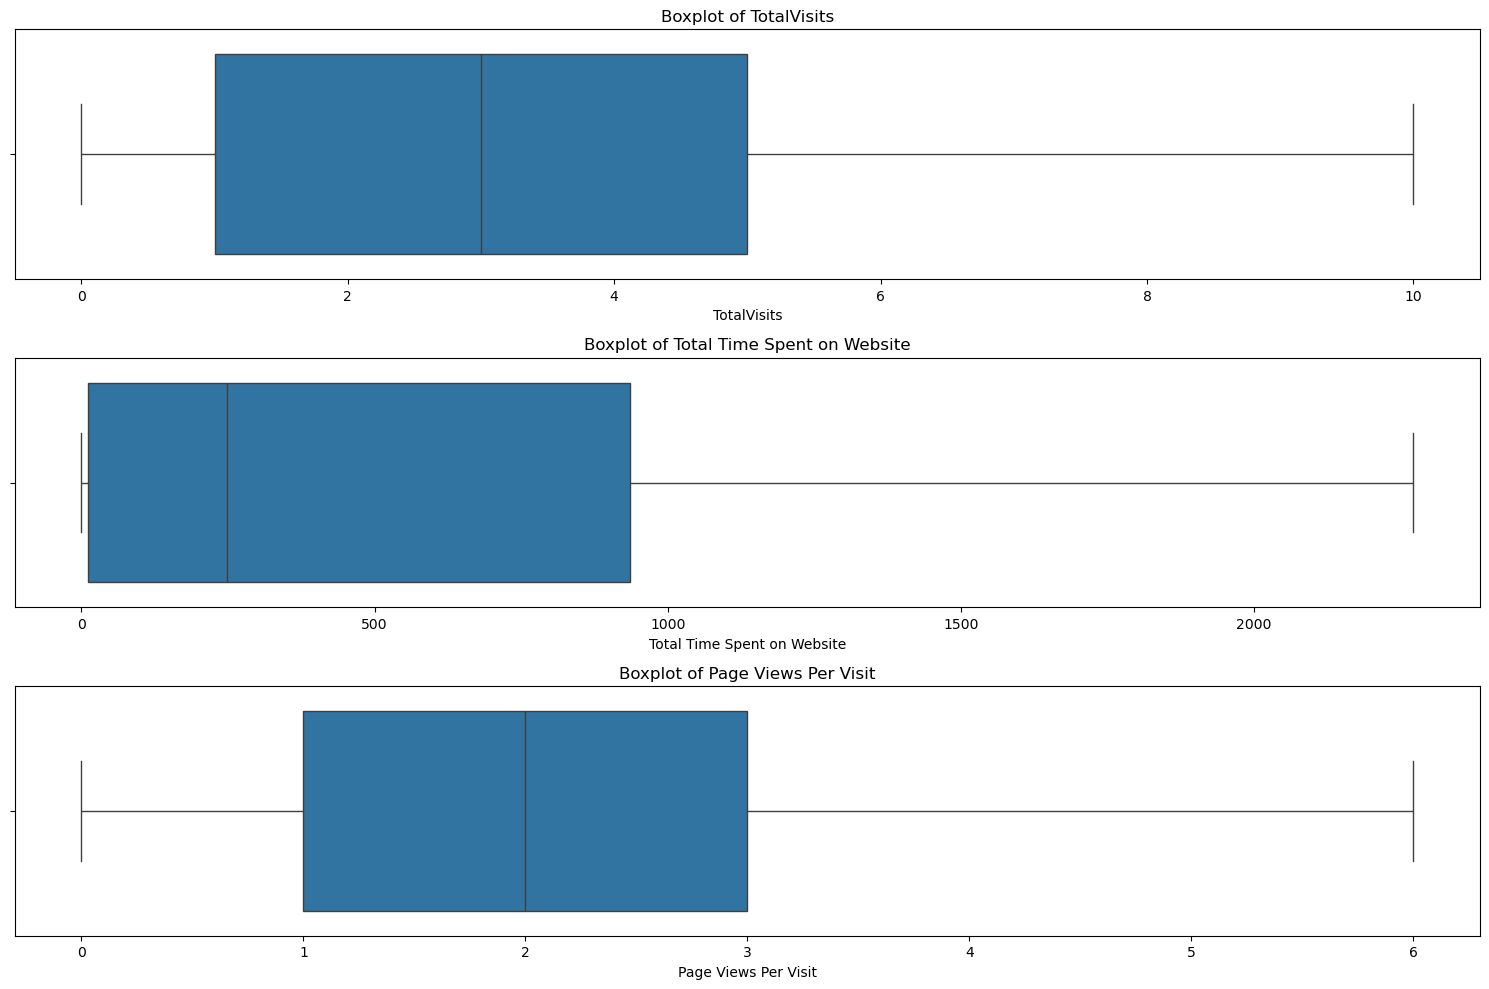

In [42]:
# Plot Boxplots to verify 
num_columnns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Set figure size
plt.figure(figsize=(15, 10))

# Loop through the numerical variables and create boxplots
for i, var in enumerate(num_columnns):
    plt.subplot(3, 1, i+1)  
    sns.boxplot(x=leads[var])  
    plt.title(f'Boxplot of {var}')  
plt.tight_layout()
plt.show()

#### Outlier issue is now resolved.

### STEP 4 - DUMMY VARIABLES CREATION

In [43]:
# CONVERTING DUMMY VARIABLES FOR CATEGORICAL COLUMNS 

cat_columns = leads.select_dtypes(include="object").columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'occupation', 'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [44]:
# CONVERTING DUMMY VARIABLES FOR CATEGORICAL COLUMNS

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'occupation', 'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True).astype('uint8')

# Adding the results to the master dataframe

leads1 = pd.concat([leads, dummy], axis=1)
leads1.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_others,City_Other Cities,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,Interested in other courses,Other Cities,No,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,others,Unemployed,Ringing,Other Cities,No,Email Opened,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,Will revert after reading the email,Mumbai,No,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
# DROPPING REDUNDANT COLUMNS

leads1.shape

(9240, 72)

In [46]:
# CHECKING SHAPE

leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Origin                                         9240 non-null   object 
 1   Lead Source                                         9240 non-null   object 
 2   Converted                                           9240 non-null   int64  
 3   TotalVisits                                         9240 non-null   float64
 4   Total Time Spent on Website                         9240 non-null   int64  
 5   Page Views Per Visit                                9240 non-null   float64
 6   Last Activity                                       9240 non-null   object 
 7   Specialization                                      9240 non-null   object 
 8   occupation                                          9240 non-null   object 
 9

In [47]:
#DROPPING ORIGINAL COLUMNS BEFORE DUMMY VARIABLES 

leads1 = leads1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'occupation', 'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'], axis=1)

In [48]:
leads1.head(4)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_others,City_Other Cities,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


NOW THAT ALL VARIABLES ARE NUMERICAL MOVING ON WITH MODEL BUILDING

### Step 5 - TRAIN-TEST SPLIT

In [49]:
# IMPORTING train_test_split

from sklearn.model_selection import train_test_split

In [50]:
# TRAIN- TEST SPLIT

y = leads1['Converted']

X = leads1.drop(['Converted'],axis=1)

X.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_others,City_Other Cities,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# SPLITTING DATA INTO TRAIN AND TEST SET

X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.7, random_state=100)

In [52]:
# PRINT SHAPE

print(X_train.shape, X_test.shape)

(6468, 62) (2772, 62)


### STEP 6 - FEATURE SCALING

In [53]:
# IMPORTING STANDARDSCALER

from sklearn.preprocessing import StandardScaler

# INSTANCIATING StandardScaler

scaler = StandardScaler()

# fit_transform- NUMERICAL FEATURES 

X_train[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(
    X_train[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_others,City_Other Cities,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.149699,-0.885371,-1.266675,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.662077,-0.691418,0.143543,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.662077,1.365219,1.553761,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,-1.149699,-0.885371,-1.266675,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
# Checking the conversion Rate

conversion = (sum(leads1['Converted'])/len(leads1['Converted'].index))*100
conversion

38.53896103896104

Current Comversion rate is ~39%

### Step 7 - FEATURE SELECTION USING RFE & MODEL BUILDING


In [55]:
# IMPORTING LogisticRegression AND INSTANCIATING IT

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
# USING RFE TO SELECT 20 FEATURES

from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [57]:
# RFE SELECTED FEATURES

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_others', False, 11),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 2),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Page Visited on Website', False, 18),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_others', False, 37),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_E-COMMERCE', False, 22),
 ('Specialization_Finance Management', False, 

In [58]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Resubscribed to emails'],
      dtype='object')

In [59]:
# Features Removed
col_drop = X_train.columns[~rfe.support_]
col_drop

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_others',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management', 'Specialization_others',
       'occupation_Housewife', 'occupation_Student', 'occupation_Une

In [60]:
# IMPORTING STATSMODELS.API

import statsmodels.api as sm

#### 1st Model

In [61]:
# 1st LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1= logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1487.8
Date:                Sun, 20 Oct 2024   Deviance:                       2975.7
Time:                        23:50:36   Pearson chi2:                 8.45e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5808
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.2869      0.332    -12.902      0.000      -4.938      -3.636
Total Time Spent on Website                        1.1003      0.055     20.072      0.000       0.993       1.208
Lead Origin_Lead Add Form                          4.0034      0.414      9.663      0.000       3.191       4.815
Lead Source_Olark Chat                             1.3344      0.134      9.938      0.000       1.071       1.598
Lead Source_Reference                             -2.1364      0.535     -3.993      0.000      -3.185      -1.088
Last Activity_Email Bounced                       -0.9910      0.398     -2.490      0.013      -1.771      -0.211
Last Activity_Email Opened                         1.0904      0.221      4.925      0.000       0.656       1.524
Last Activity_SMS Sent                             1.8541      0.150     12.366      0.000       1.560       2.148
Specialization_Hospitality Management             -0.8942      0.449     -1.991      0.046      -1.774      -0.014
Specialization_International Business             -0.8637      0.385     -2.244      0.025      -1.618      -0.109
Specialization_Travel and Tourism                 -0.9855      0.379     -2.601      0.009      -1.728      -0.243
occupation_Other                                  -0.9985      0.107     -9.349      0.000      -1.208      -0.789
Tags_Closed by Horizzon                            9.1186      1.058      8.621      0.000       7.045      11.192
Tags_Ringing                                      -0.7938      0.370     -2.143      0.032      -1.520      -0.068
Tags_Will revert after reading the email           6.7752      0.342     19.829      0.000       6.106       7.445
Tags_others                                        2.8524      0.306      9.332      0.000       2.253       3.452
Last Notable Activity_Email Opened                -0.7634      0.248     -3.083      0.002      -1.249      -0.278
Last Notable Activity_Had a Phone Conversation     2.5161      1.389      1.812      0.070      -0.206       5.238
Last Notable Activity_Modified                    -1.1283      0.142     -7.936      0.000      -1.407      -0.850
Last Notable Activity_Olark Chat Conversation     -0.9047      0.416     -2.177      0.029      -1.719      -0.090
Last Notable Activity_Resubscribed to emails      22.6388   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
==================================================================================================================
"""

#### Checking VIF

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Email Opened,7.95
5,Last Activity_Email Opened,7.30
14,Tags_others,4.74
1,Lead Origin_Lead Add Form,4.54
3,Lead Source_Reference,4.38
13,Tags_Will revert after reading the email,2.52
6,Last Activity_SMS Sent,2.48
10,occupation_Other,2.46
17,Last Notable Activity_Modified,2.34
12,Tags_Ringing,1.66


Dropping 'Last Notable Activity_Resubscribed to emails' due  to its high p-value.

In [64]:
col= col.drop('Last Notable Activity_Resubscribed to emails', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

#### 2nd Model

In [65]:
# 2nd LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2= logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1490.0
Date:                Sun, 20 Oct 2024   Deviance:                       2980.1
Time:                        23:50:36   Pearson chi2:                 8.44e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5805
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.2715      0.332    -12.869      0.000      -4.922      -3.621
Total Time Spent on Website                        1.0997      0.055     20.068      0.000       0.992       1.207
Lead Origin_Lead Add Form                          4.0050      0.414      9.668      0.000       3.193       4.817
Lead Source_Olark Chat                             1.3409      0.134      9.997      0.000       1.078       1.604
Lead Source_Reference                             -2.1350      0.535     -3.990      0.000      -3.184      -1.086
Last Activity_Email Bounced                       -0.9998      0.398     -2.514      0.012      -1.779      -0.220
Last Activity_Email Opened                         1.0838      0.221      4.901      0.000       0.650       1.517
Last Activity_SMS Sent                             1.8392      0.150     12.300      0.000       1.546       2.132
Specialization_Hospitality Management             -0.8937      0.449     -1.989      0.047      -1.774      -0.013
Specialization_International Business             -0.8640      0.385     -2.245      0.025      -1.618      -0.110
Specialization_Travel and Tourism                 -0.9851      0.379     -2.601      0.009      -1.728      -0.243
occupation_Other                                  -0.9928      0.107     -9.306      0.000      -1.202      -0.784
Tags_Closed by Horizzon                            9.1166      1.058      8.619      0.000       7.043      11.190
Tags_Ringing                                      -0.7937      0.370     -2.143      0.032      -1.519      -0.068
Tags_Will revert after reading the email           6.7738      0.342     19.830      0.000       6.104       7.443
Tags_others                                        2.8515      0.306      9.330      0.000       2.252       3.450
Last Notable Activity_Email Opened                -0.7753      0.247     -3.133      0.002      -1.260      -0.290
Last Notable Activity_Had a Phone Conversation     2.4988      1.388      1.800      0.072      -0.222       5.219
Last Notable Activity_Modified                    -1.1404      0.142     -8.031      0.000      -1.419      -0.862
Last Notable Activity_Olark Chat Conversation     -0.9268      0.415     -2.233      0.026      -1.740      -0.113
==================================================================================================================
"""

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Email Opened,7.95
5,Last Activity_Email Opened,7.30
14,Tags_others,4.74
1,Lead Origin_Lead Add Form,4.54
3,Lead Source_Reference,4.38
13,Tags_Will revert after reading the email,2.52
6,Last Activity_SMS Sent,2.48
10,occupation_Other,2.46
17,Last Notable Activity_Modified,2.34
12,Tags_Ringing,1.66


Dropping 'Last Notable Activity_Had a Phone Conversation' due to its high p-value.

In [67]:
col= col.drop('Last Notable Activity_Had a Phone Conversation', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

#### 3rd Model

In [68]:
# 3rd LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3= logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1491.7
Date:                Sun, 20 Oct 2024   Deviance:                       2983.5
Time:                        23:50:37   Pearson chi2:                 8.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5802
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.2413      0.331    -12.814      0.000      -4.890      -3.593
Total Time Spent on Website                       1.0967      0.055     20.045      0.000       0.989       1.204
Lead Origin_Lead Add Form                         3.9992      0.414      9.656      0.000       3.187       4.811
Lead Source_Olark Chat                            1.3318      0.134      9.945      0.000       1.069       1.594
Lead Source_Reference                            -2.1362      0.535     -3.991      0.000      -3.185      -1.087
Last Activity_Email Bounced                      -1.0159      0.398     -2.555      0.011      -1.795      -0.237
Last Activity_Email Opened                        1.0743      0.221      4.861      0.000       0.641       1.507
Last Activity_SMS Sent                            1.8149      0.149     12.216      0.000       1.524       2.106
Specialization_Hospitality Management            -0.8969      0.450     -1.994      0.046      -1.778      -0.016
Specialization_International Business            -0.8697      0.385     -2.259      0.024      -1.624      -0.115
Specialization_Travel and Tourism                -0.9863      0.378     -2.609      0.009      -1.727      -0.245
occupation_Other                                 -0.9914      0.107     -9.299      0.000      -1.200      -0.782
Tags_Closed by Horizzon                           9.1124      1.058      8.615      0.000       7.039      11.185
Tags_Ringing                                     -0.7947      0.370     -2.147      0.032      -1.520      -0.069
Tags_Will revert after reading the email          6.7831      0.341     19.867      0.000       6.114       7.452
Tags_others                                       2.8516      0.305      9.335      0.000       2.253       3.450
Last Notable Activity_Email Opened               -0.7944      0.247     -3.214      0.001      -1.279      -0.310
Last Notable Activity_Modified                   -1.1588      0.141     -8.191      0.000      -1.436      -0.882
Last Notable Activity_Olark Chat Conversation    -0.9524      0.415     -2.297      0.022      -1.765      -0.140
=================================================================================================================
"""

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Email Opened,7.94
5,Last Activity_Email Opened,7.30
14,Tags_others,4.72
1,Lead Origin_Lead Add Form,4.54
3,Lead Source_Reference,4.38
13,Tags_Will revert after reading the email,2.49
6,Last Activity_SMS Sent,2.46
10,occupation_Other,2.46
16,Last Notable Activity_Modified,2.33
12,Tags_Ringing,1.65


Dropping 'Specialization_Hospitality Management' due to its high p-value.

In [70]:
col= col.drop('Specialization_Hospitality Management', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

#### 4th Model

In [71]:
# 4th LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4= logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1493.8
Date:                Sun, 20 Oct 2024   Deviance:                       2987.7
Time:                        23:50:37   Pearson chi2:                 8.38e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5800
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.2674      0.332    -12.839      0.000      -4.919      -3.616
Total Time Spent on Website                       1.0899      0.054     20.001      0.000       0.983       1.197
Lead Origin_Lead Add Form                         4.0093      0.415      9.669      0.000       3.197       4.822
Lead Source_Olark Chat                            1.3368      0.134      9.988      0.000       1.075       1.599
Lead Source_Reference                            -2.1475      0.536     -4.009      0.000      -3.197      -1.098
Last Activity_Email Bounced                      -1.0512      0.399     -2.633      0.008      -1.834      -0.269
Last Activity_Email Opened                        1.0782      0.221      4.875      0.000       0.645       1.512
Last Activity_SMS Sent                            1.8104      0.148     12.200      0.000       1.520       2.101
Specialization_International Business            -0.8526      0.384     -2.219      0.027      -1.606      -0.099
Specialization_Travel and Tourism                -0.9691      0.377     -2.568      0.010      -1.709      -0.229
occupation_Other                                 -0.9923      0.107     -9.313      0.000      -1.201      -0.783
Tags_Closed by Horizzon                           9.1206      1.058      8.623      0.000       7.048      11.194
Tags_Ringing                                     -0.7778      0.371     -2.094      0.036      -1.506      -0.050
Tags_Will revert after reading the email          6.7899      0.343     19.810      0.000       6.118       7.462
Tags_others                                       2.8718      0.307      9.352      0.000       2.270       3.474
Last Notable Activity_Email Opened               -0.8003      0.247     -3.238      0.001      -1.285      -0.316
Last Notable Activity_Modified                   -1.1635      0.141     -8.227      0.000      -1.441      -0.886
Last Notable Activity_Olark Chat Conversation    -0.9476      0.414     -2.289      0.022      -1.759      -0.136
=================================================================================================================
"""

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Email Opened,7.94
5,Last Activity_Email Opened,7.30
13,Tags_others,4.72
1,Lead Origin_Lead Add Form,4.54
3,Lead Source_Reference,4.38
12,Tags_Will revert after reading the email,2.49
6,Last Activity_SMS Sent,2.46
9,occupation_Other,2.46
15,Last Notable Activity_Modified,2.33
11,Tags_Ringing,1.65


Dropping "Last Notable Activity_Email Opened" due to its high VIF

In [73]:
col= col.drop('Last Notable Activity_Email Opened', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

#### 5th Model

In [74]:
# 5th LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5= logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1498.9
Date:                Sun, 20 Oct 2024   Deviance:                       2997.8
Time:                        23:50:38   Pearson chi2:                 8.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5793
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.4283      0.330    -13.419      0.000      -5.075      -3.782
Total Time Spent on Website                       1.0911      0.054     20.053      0.000       0.984       1.198
Lead Origin_Lead Add Form                         3.9816      0.414      9.611      0.000       3.170       4.794
Lead Source_Olark Chat                            1.3434      0.134     10.055      0.000       1.082       1.605
Lead Source_Reference                            -2.1573      0.536     -4.023      0.000      -3.208      -1.106
Last Activity_Email Bounced                      -1.0501      0.399     -2.630      0.009      -1.833      -0.268
Last Activity_Email Opened                        0.5225      0.146      3.568      0.000       0.235       0.810
Last Activity_SMS Sent                            1.9118      0.145     13.161      0.000       1.627       2.196
Specialization_International Business            -0.8600      0.383     -2.244      0.025      -1.611      -0.109
Specialization_Travel and Tourism                -0.9844      0.377     -2.610      0.009      -1.724      -0.245
occupation_Other                                 -1.0141      0.106     -9.550      0.000      -1.222      -0.806
Tags_Closed by Horizzon                           9.2546      1.059      8.742      0.000       7.180      11.329
Tags_Ringing                                     -0.7590      0.371     -2.046      0.041      -1.486      -0.032
Tags_Will revert after reading the email          6.7844      0.343     19.778      0.000       6.112       7.457
Tags_others                                       2.8798      0.308      9.363      0.000       2.277       3.483
Last Notable Activity_Modified                   -0.9188      0.119     -7.741      0.000      -1.151      -0.686
Last Notable Activity_Olark Chat Conversation    -0.7854      0.412     -1.908      0.056      -1.592       0.021
=================================================================================================================
"""

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,4.54
13,Tags_others,4.42
3,Lead Source_Reference,4.38
9,occupation_Other,2.45
6,Last Activity_SMS Sent,2.37
12,Tags_Will revert after reading the email,2.35
5,Last Activity_Email Opened,2.26
14,Last Notable Activity_Modified,1.74
2,Lead Source_Olark Chat,1.58
11,Tags_Ringing,1.54


Dropping 'Last Notable Activity_Olark Chat Conversation' due to its high P-vale

In [76]:
col= col.drop('Last Notable Activity_Olark Chat Conversation', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others',
       'Last Notable Activity_Modified'],
      dtype='object')

#### 6th Model

In [77]:
# 6th LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6= logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1500.9
Date:                Sun, 20 Oct 2024   Deviance:                       3001.9
Time:                        23:50:38   Pearson chi2:                 8.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5791
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5158      0.327    -13.795      0.000      -5.157      -3.874
Total Time Spent on Website                  1.0872      0.054     19.980      0.000       0.981       1.194
Lead Origin_Lead Add Form                    3.9787      0.414      9.600      0.000       3.166       4.791
Lead Source_Olark Chat                       1.3130      0.133      9.874      0.000       1.052       1.574
Lead Source_Reference                       -2.1681      0.536     -4.043      0.000      -3.219      -1.117
Last Activity_Email Bounced                 -0.9918      0.399     -2.486      0.013      -1.774      -0.210
Last Activity_Email Opened                   0.6137      0.140      4.389      0.000       0.340       0.888
Last Activity_SMS Sent                       1.9938      0.140     14.228      0.000       1.719       2.268
Specialization_International Business       -0.8510      0.384     -2.219      0.027      -1.603      -0.099
Specialization_Travel and Tourism           -0.9796      0.377     -2.599      0.009      -1.718      -0.241
occupation_Other                            -1.0268      0.106     -9.689      0.000      -1.234      -0.819
Tags_Closed by Horizzon                      9.2497      1.058      8.741      0.000       7.176      11.324
Tags_Ringing                                -0.7505      0.371     -2.025      0.043      -1.477      -0.024
Tags_Will revert after reading the email     6.7920      0.343     19.813      0.000       6.120       7.464
Tags_others                                  2.8818      0.307      9.379      0.000       2.280       3.484
Last Notable Activity_Modified              -0.8665      0.116     -7.496      0.000      -1.093      -0.640
============================================================================================================
"""

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,4.54
3,Lead Source_Reference,4.38
13,Tags_others,4.33
9,occupation_Other,2.45
6,Last Activity_SMS Sent,2.31
12,Tags_Will revert after reading the email,2.31
5,Last Activity_Email Opened,2.19
14,Last Notable Activity_Modified,1.69
2,Lead Source_Olark Chat,1.54
11,Tags_Ringing,1.52


Dropping "Tags_Ringing" due to high p-value

In [79]:
col= col.drop('Tags_Ringing', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Will revert after reading the email',
       'Tags_others', 'Last Notable Activity_Modified'],
      dtype='object')

#### 7 Model

In [80]:
# 7th LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res7= logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1502.8
Date:                Sun, 20 Oct 2024   Deviance:                       3005.7
Time:                        23:50:39   Pearson chi2:                 8.05e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5788
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.0486      0.224    -22.489      0.000      -5.489      -4.609
Total Time Spent on Website                  1.0862      0.054     19.978      0.000       0.980       1.193
Lead Origin_Lead Add Form                    3.9649      0.412      9.623      0.000       3.157       4.772
Lead Source_Olark Chat                       1.3169      0.133      9.910      0.000       1.056       1.577
Lead Source_Reference                       -2.1732      0.532     -4.087      0.000      -3.215      -1.131
Last Activity_Email Bounced                 -0.9888      0.399     -2.476      0.013      -1.771      -0.206
Last Activity_Email Opened                   0.6225      0.140      4.447      0.000       0.348       0.897
Last Activity_SMS Sent                       1.9736      0.140     14.118      0.000       1.700       2.248
Specialization_International Business       -0.8448      0.383     -2.204      0.028      -1.596      -0.093
Specialization_Travel and Tourism           -0.9717      0.377     -2.580      0.010      -1.710      -0.233
occupation_Other                            -1.0288      0.106     -9.726      0.000      -1.236      -0.821
Tags_Closed by Horizzon                      9.7741      1.032      9.469      0.000       7.751      11.797
Tags_Will revert after reading the email     7.3199      0.249     29.367      0.000       6.831       7.808
Tags_others                                  3.4153      0.193     17.725      0.000       3.038       3.793
Last Notable Activity_Modified              -0.8528      0.116     -7.383      0.000      -1.079      -0.626
============================================================================================================
"""

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,4.54
3,Lead Source_Reference,4.38
12,Tags_others,3.72
9,occupation_Other,2.45
11,Tags_Will revert after reading the email,1.97
6,Last Activity_SMS Sent,1.76
5,Last Activity_Email Opened,1.64
13,Last Notable Activity_Modified,1.60
2,Lead Source_Olark Chat,1.53
10,Tags_Closed by Horizzon,1.39


Dropping "Lead Origin_Lead Add Form" due to high VIF value.

In [82]:
col= col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Will revert after reading the email',
       'Tags_others', 'Last Notable Activity_Modified'],
      dtype='object')

### 8th Model

In [83]:
# 8th LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res8= logm8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.6
Date:                Sun, 20 Oct 2024   Deviance:                       3173.2
Time:                        23:50:39   Pearson chi2:                 7.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5678
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.9096      0.218    -22.482      0.000      -5.338      -4.482
Total Time Spent on Website                  0.9454      0.051     18.407      0.000       0.845       1.046
Lead Source_Olark Chat                       1.0300      0.127      8.095      0.000       0.781       1.279
Lead Source_Reference                        1.4722      0.350      4.206      0.000       0.786       2.158
Last Activity_Email Bounced                 -0.7502      0.366     -2.048      0.041      -1.468      -0.032
Last Activity_Email Opened                   0.6050      0.136      4.442      0.000       0.338       0.872
Last Activity_SMS Sent                       2.0215      0.135     14.920      0.000       1.756       2.287
Specialization_International Business       -0.9826      0.378     -2.600      0.009      -1.723      -0.242
Specialization_Travel and Tourism           -1.1223      0.365     -3.074      0.002      -1.838      -0.407
occupation_Other                            -1.2258      0.102    -11.979      0.000      -1.426      -1.025
Tags_Closed by Horizzon                      9.8788      1.030      9.593      0.000       7.861      11.897
Tags_Will revert after reading the email     7.2698      0.245     29.662      0.000       6.789       7.750
Tags_others                                  3.5649      0.189     18.816      0.000       3.194       3.936
Last Notable Activity_Modified              -0.8280      0.111     -7.429      0.000      -1.046      -0.610
============================================================================================================
"""

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_others,3.62
8,occupation_Other,2.40
10,Tags_Will revert after reading the email,1.96
5,Last Activity_SMS Sent,1.75
4,Last Activity_Email Opened,1.64
12,Last Notable Activity_Modified,1.60
1,Lead Source_Olark Chat,1.51
2,Lead Source_Reference,1.45
9,Tags_Closed by Horizzon,1.37
0,Total Time Spent on Website,1.34


Dropping "Last Activity_Email Bounced" due to high p-value

In [85]:
col= col.drop('Last Activity_Email Bounced', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_International Business',
       'Specialization_Travel and Tourism', 'occupation_Other',
       'Tags_Closed by Horizzon', 'Tags_Will revert after reading the email',
       'Tags_others', 'Last Notable Activity_Modified'],
      dtype='object')

### 9 MODEL

In [86]:
# 9th LOGISTIC REGRESSION MODEL

X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res9= logm9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.0
Date:                Sun, 20 Oct 2024   Deviance:                       3178.0
Time:                        23:50:39   Pearson chi2:                 7.56e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5674
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.9792      0.217    -22.990      0.000      -5.404      -4.555
Total Time Spent on Website                  0.9435      0.051     18.407      0.000       0.843       1.044
Lead Source_Olark Chat                       1.0422      0.127      8.200      0.000       0.793       1.291
Lead Source_Reference                        1.4614      0.351      4.160      0.000       0.773       2.150
Last Activity_Email Opened                   0.6737      0.133      5.055      0.000       0.412       0.935
Last Activity_SMS Sent                       2.0934      0.132     15.829      0.000       1.834       2.353
Specialization_International Business       -0.9962      0.380     -2.620      0.009      -1.741      -0.251
Specialization_Travel and Tourism           -1.1298      0.364     -3.106      0.002      -1.843      -0.417
occupation_Other                            -1.2159      0.102    -11.900      0.000      -1.416      -1.016
Tags_Closed by Horizzon                      9.9119      1.030      9.624      0.000       7.893      11.931
Tags_Will revert after reading the email     7.2862      0.245     29.694      0.000       6.805       7.767
Tags_others                                  3.5580      0.189     18.786      0.000       3.187       3.929
Last Notable Activity_Modified              -0.8350      0.111     -7.496      0.000      -1.053      -0.617
============================================================================================================
"""

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_others,3.55
7,occupation_Other,2.39
9,Tags_Will revert after reading the email,1.94
4,Last Activity_SMS Sent,1.72
3,Last Activity_Email Opened,1.62
11,Last Notable Activity_Modified,1.55
1,Lead Source_Olark Chat,1.51
2,Lead Source_Reference,1.45
8,Tags_Closed by Horizzon,1.37
0,Total Time Spent on Website,1.34


#### P-value for all feature is under significance level of 0.5
#### VIF is also well within 5, moving on with "res9" model.

#### MAKING PRODICTION ON TRAIN SET

In [88]:
# PREDICTING VALUES

y_train_pred = res9.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.01632513, 0.32254636, 0.01953925, 0.16830804, 0.20171882,
       0.99788824, 0.00673229, 0.99509458, 0.05213186, 0.99809892])

In [89]:
# CREATIND DATAFRAME y_train_pred_final WITH ORIGINAL CONVERTED AND PREDICTED VALUES 

y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Converted_prob": y_train_pred})
y_train_pred_final['ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,ID
0,0,0.016325,1871
1,0,0.322546,6795
2,0,0.019539,3516
3,0,0.168308,8105
4,0,0.201719,3934


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0. At this stage this value is completely arbitrary.

In [90]:
# CREATING NEW FEATURE 'PREDICTED'

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted
0,0,0.016325,1871,0
1,0,0.322546,6795,0
2,0,0.019539,3516,0
3,0,0.168308,8105,0
4,0,0.201719,3934,0


In [91]:
# CONFUSION MATRIX

from sklearn import metrics

confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3753,  249],
       [ 473, 1993]], dtype=int64)

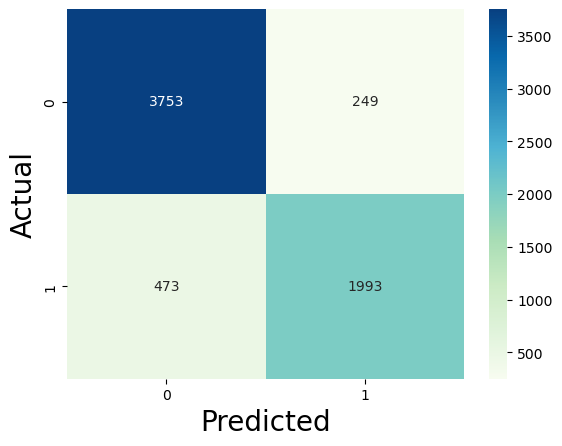

In [92]:
#Importing library to plot confusion matrix:-

from sklearn.metrics import ConfusionMatrixDisplay

# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [93]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8883735312306741


### STEP 8 : MODEL EVALUATION

#### Metrics beyond Accuracy

In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity/Recall (No of Actual Converions Indentified as Converted) : ", TP / float(TP+FN))
    print("Specificity (Non-Conversions Identified as Non-Converted ) : ", TN / float(TN+FP))
    print("False postive rate (Non-Conversions Identified as Conversion) : ", FP/ float(TN+FP))
    print("Positive predictive value/ Precision  (correctly predicted conversions) : ", TP / float(TP+FP))
    print("Negative predictive value (correctly predicted non-conversions) : ", TN / float(TN+FN))

In [96]:
# CALLING USER DEFINED FUNCTION other_metrics

other_metrics(confusion)

Sensitivity/Recall (No of Actual Converions Indentified as Converted) :  0.8081914030819141
Specificity (Non-Conversions Identified as Non-Converted ) :  0.9377811094452774
False postive rate (Non-Conversions Identified as Conversion) :  0.06221889055472264
Positive predictive value/ Precision  (correctly predicted conversions) :  0.8889384478144514
Negative predictive value (correctly predicted non-conversions) :  0.8880738286796025


#### Interpretation:
  - A sensitivity of 0.80 means that the model correctly identifies about 80% of the leads that actually convert.
  - A specificity of 0.93 means that the model correctly identifies about 93.77% of the leads that do not convert.
  - A false positive rate of 0.06 means that about 6% of the leads that do not convert are incorrectly predicted as converters.
  - A PPV of 0.88 means that when the model predicts a lead will convert, it is correct 88.89% of the time.
  - An NPV of 0.8880 means that when the model predicts a lead will not convert, it is correct 88.80% of the time.

### Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

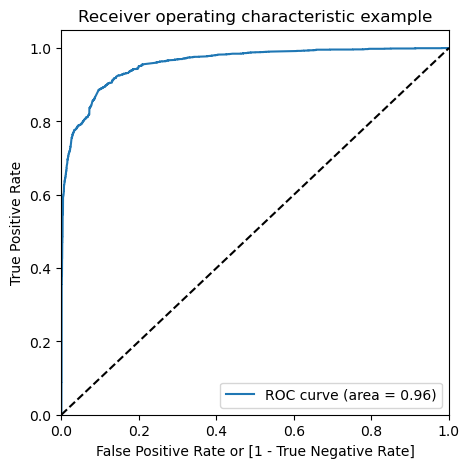

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

At a cut off of 0.5; Area under curve is 0.96 which is very close to ideal auc of 1.

### Finding Optimal Cutoff Point

#### Optimal cutoff probability is the probability where we get balanced sensitivity and specificity.

In [100]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.016325,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.322546,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.019539,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.168308,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.201719,3934,0,1,1,1,0,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.793908  0.971208  0.684658
0.2   0.2  0.866883  0.935523  0.824588
0.3   0.3  0.889765  0.899027  0.884058
0.4   0.4  0.895022  0.858070  0.917791
0.5   0.5  0.888374  0.808191  0.937781
0.6   0.6  0.892393  0.781427  0.960770
0.7   0.7  0.889456  0.751825  0.974263
0.8   0.8  0.875696  0.701946  0.982759
0.9   0.9  0.857607  0.641525  0.990755


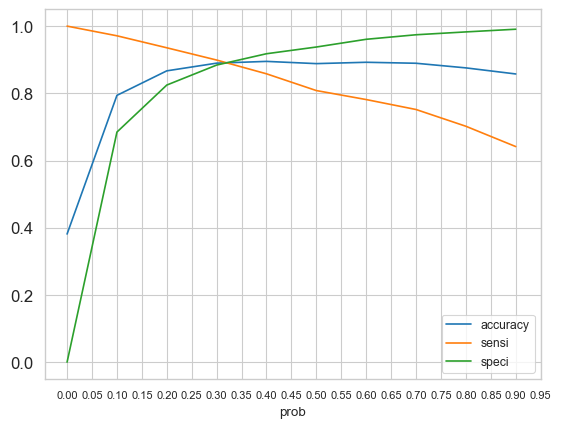

In [102]:
    # Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

#### From the above curve, 0.33 is the optimum cutoff probability.

In [103]:
# ASSIGNING VALUES TO 'final_predicted' BASIS CUT-OFF OF 0.33

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.016325,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.322546,6795,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.019539,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.168308,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.201719,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [104]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8930117501546073

In [105]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3577,  425],
       [ 267, 2199]], dtype=int64)

In [106]:
# Assigning values

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Calling function other_metrics

other_metrics(confusion2)

Sensitivity/Recall (No of Actual Converions Indentified as Converted) :  0.8917274939172749
Specificity (Non-Conversions Identified as Non-Converted ) :  0.8938030984507747
False postive rate (Non-Conversions Identified as Conversion) :  0.10619690154922538
Positive predictive value/ Precision  (correctly predicted conversions) :  0.8380335365853658
Negative predictive value (correctly predicted non-conversions) :  0.9305411030176899


Interpretation:
- Sensitivity/Recall (0.8917): This indicates that 89.17% of actual conversions were correctly identified as conversions.
- Specificity (0.8938): This means that 89.38% of non-conversions were correctly identified as non-conversions.
- False Positive Rate (0.1061): This represents the proportion of non-conversions incorrectly predicted as conversions, which is about 10.61%.
- Precision (0.8380): Of all the predicted conversions, 83.80% were actual conversions.
- Negative Predictive Value (0.9305): Of all the predicted non-conversions, 93.05% were actual non-conversions.

#### Although a cut-off of 0.33 is giving a pretty good model, lets check if with Precision-Recall it can be further improved.

### Precision and Recall Tradeoff

In [108]:
# IMPORTING precision_recall_curve

from sklearn.metrics import precision_recall_curve

In [109]:
# CHECKING VALUES

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

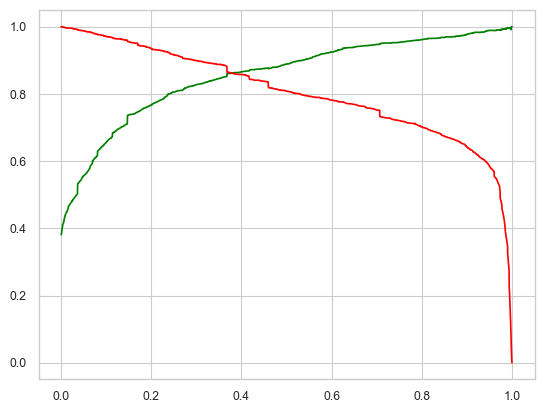

In [111]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The above present Precision- Recall curve suggests an optimal cut off of 0.38

Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation

In [112]:
# CREATING 'final_predicted_PR' BASIS NEW CUT-OFF OF 0.38

y_train_pred_final['final_predicted_PR'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_PR
0,0,0.016325,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.322546,6795,0,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0.019539,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.168308,8105,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0.201719,3934,0,1,1,1,0,0,0,0,0,0,0,0,0


In [113]:
# CONFUSION MATRIX

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_PR)
print(confusion3)

[[3663  339]
 [ 342 2124]]


In [114]:
# Assigning values
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [115]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_PR)

0.8947124304267161

In [116]:
# Calling function other_metrics

other_metrics(confusion3)

Sensitivity/Recall (No of Actual Converions Indentified as Converted) :  0.8613138686131386
Specificity (Non-Conversions Identified as Non-Converted ) :  0.9152923538230885
False postive rate (Non-Conversions Identified as Conversion) :  0.08470764617691154
Positive predictive value/ Precision  (correctly predicted conversions) :  0.8623629719853837
Negative predictive value (correctly predicted non-conversions) :  0.9146067415730337


#### Interpretation basis confusion2 v/s confusion3 
- Cutoff 0.33 is likely better aligned with our goal of identifying the maximum number of leads that can convert. It gives a slightly higher recall (89.17%), meaning we’ll identify more potential customers. The trade-off is a marginally higher false positive rate and slightly lower precision, but since our focus is on maximizing lead capture, this is acceptable.

- We'll go ahead with a cutoff of 0.33.
  

### Making predictions on the test set


In [117]:
# Scaling TEST SET 

X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']] =scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

In [118]:
# Keeping only RFE selected and final features kept in res9 (final model) in Test set

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_International Business,Specialization_Travel and Tourism,occupation_Other,Tags_Closed by Horizzon,Tags_Will revert after reading the email,Tags_others,Last Notable Activity_Modified
4269,0.964504,0,0,0,1,0,0,1,0,0,1,0
2376,-0.885371,0,1,0,1,0,0,0,0,1,0,0
7766,-0.777416,0,0,0,0,0,0,0,0,1,0,0
9199,-0.885371,1,0,0,0,0,0,0,0,0,0,1
4359,-0.885371,0,1,1,0,0,0,0,0,1,0,0


In [119]:
# Checking shape

X_test.shape

(2772, 12)

In [120]:
# Adding constant to X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     2772 non-null   float64
 1   Total Time Spent on Website               2772 non-null   float64
 2   Lead Source_Olark Chat                    2772 non-null   uint8  
 3   Lead Source_Reference                     2772 non-null   uint8  
 4   Last Activity_Email Opened                2772 non-null   uint8  
 5   Last Activity_SMS Sent                    2772 non-null   uint8  
 6   Specialization_International Business     2772 non-null   uint8  
 7   Specialization_Travel and Tourism         2772 non-null   uint8  
 8   occupation_Other                          2772 non-null   uint8  
 9   Tags_Closed by Horizzon                   2772 non-null   uint8  
 10  Tags_Will revert after reading the ema

In [121]:
# Predicting the final test model 

y_test_pred = res9.predict(X_test_sm)
y_test_pred[:10]

4269    0.590576
2376    0.993481
7766    0.828294
9199    0.003658
4359    0.973578
9186    0.990260
1631    0.980046
8963    0.931378
8007    0.023810
5324    0.978987
dtype: float64

In [122]:
# Converting y_test_pred to a dataframe which is an array now

y_pred_1 = pd.DataFrame(y_test_pred)

# Renaming the column 

y_pred_1= y_pred_1.rename(columns={ 0 : 'Converted_Prob'})
y_pred_1.head()


,Converted_Prob
4269,0.590576
2376,0.993481
7766,0.828294
9199,0.003658
4359,0.973578


In [123]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [124]:
# Putting CustID to index

y_test_df['ID'] = y_test_df.index

In [125]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Concatenating y_test_df and y_pred_1 (i.e y_test and y_test_predicted)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ID,Converted_Prob
0,1,4269,0.590576
1,1,2376,0.993481
2,1,7766,0.828294
3,0,9199,0.003658
4,1,4359,0.973578


In [127]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,ID,Converted,Converted_Prob
0,4269,1,0.590576
1,2376,1,0.993481
2,7766,1,0.828294
3,9199,0,0.003658
4,4359,1,0.973578


In [128]:
# creating final_predicted values basis cut off of 0.33

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.590576,1
1,2376,1,0.993481,1
2,7766,1,0.828294,1
3,9199,0,0.003658,0
4,4359,1,0.973578,1


In [129]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8979076479076479

In [130]:
# CONFUSION MATRIX

confusion_final = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_final

array([[1501,  176],
       [ 107,  988]], dtype=int64)

In [131]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [132]:
# Calling function other_metrics

other_metrics(confusion_final)

Sensitivity/Recall (No of Actual Converions Indentified as Converted) :  0.902283105022831
Specificity (Non-Conversions Identified as Non-Converted ) :  0.8950506857483602
False postive rate (Non-Conversions Identified as Conversion) :  0.10494931425163984
Positive predictive value/ Precision  (correctly predicted conversions) :  0.8487972508591065
Negative predictive value (correctly predicted non-conversions) :  0.9334577114427861


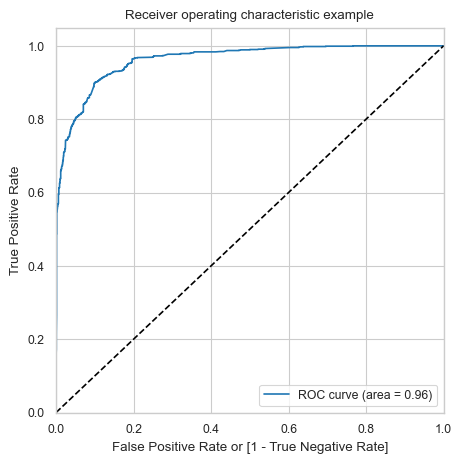

In [133]:
# Invoking the function to draw ROC curve
draw_roc( y_pred_final.Converted, y_pred_final.Converted_Prob)

#### Lead Score

In [134]:
# CALCULATING LEAD_SCORE

y_pred_final['Lead_score']= (y_pred_final.Converted_Prob*100).astype("int")

In [135]:
y_pred_final

,ID,Converted,Converted_Prob,final_predicted,Lead_score
0,4269,1,0.590576,1,59
1,2376,1,0.993481,1,99
2,7766,1,0.828294,1,82
3,9199,0,0.003658,0,0
4,4359,1,0.973578,1,97
...,...,...,...,...,...
2767,8649,0,0.048718,0,4
2768,2152,1,0.459324,1,45
2769,7101,0,0.368051,1,36
2770,5331,0,0.065297,0,6


### Final Comments

In [136]:
# Displaying parameters obtained by final model 'res9':-

pd.options.display.float_format = '{:.2f}'.format
res9.params[1:]

Total Time Spent on Website                 0.94
Lead Source_Olark Chat                      1.04
Lead Source_Reference                       1.46
Last Activity_Email Opened                  0.67
Last Activity_SMS Sent                      2.09
Specialization_International Business      -1.00
Specialization_Travel and Tourism          -1.13
occupation_Other                           -1.22
Tags_Closed by Horizzon                     9.91
Tags_Will revert after reading the email    7.29
Tags_others                                 3.56
Last Notable Activity_Modified             -0.83
dtype: float64

In [137]:
# TRAIN SET ACCURACY

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8930117501546073

In [138]:
# TEST SET ACCURACY

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8979076479076479

In [139]:
# TRAIN METRICS

other_metrics(confusion2)

Sensitivity/Recall (No of Actual Converions Indentified as Converted) :  0.8917274939172749
Specificity (Non-Conversions Identified as Non-Converted ) :  0.8938030984507747
False postive rate (Non-Conversions Identified as Conversion) :  0.10619690154922538
Positive predictive value/ Precision  (correctly predicted conversions) :  0.8380335365853658
Negative predictive value (correctly predicted non-conversions) :  0.9305411030176899


In [140]:
# TEST METRICS

other_metrics(confusion_final)

Sensitivity/Recall (No of Actual Converions Indentified as Converted) :  0.902283105022831
Specificity (Non-Conversions Identified as Non-Converted ) :  0.8950506857483602
False postive rate (Non-Conversions Identified as Conversion) :  0.10494931425163984
Positive predictive value/ Precision  (correctly predicted conversions) :  0.8487972508591065
Negative predictive value (correctly predicted non-conversions) :  0.9334577114427861


- The metrics for both the training and test sets indicate that the model is performing consistently on both datasets, with similar values across key metrics.
  
1. Accuracy:
- Train set: 89.30%
- Test set: 89.79%
- The training and test accuracy are almost identical, indicating that the model generalizes well and isn’t overfitting to the training data.

2. Sensitivity/Recall:
- Train: 89.17%
- Test: 90.23%
- Sensitivity (or recall) is very close in both sets. It shows that the model is effective at capturing actual conversions.

3. Specificity:
- Train: 89.38%
- Test: 89.51%
- Specificity is also quite balanced, indicating that the model is equally effective at identifying non-conversions.

4. Precision:
- Train: 83.80%
- Test: 84.88%
- This shows the model is making slightly fewer false positive predictions on the test set, which is good for business.

5. False Positive Rate (FPR):
- Train: 10.62%
- Test: 10.49%
- FPR is low and almost the same for both sets, meaning the model is doing well at not predicting too many false positives (labeling non-conversions as conversions).

6. The optimal threshold for the model is 0.33 which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.

In [141]:
res9.params[1:]

Total Time Spent on Website                 0.94
Lead Source_Olark Chat                      1.04
Lead Source_Reference                       1.46
Last Activity_Email Opened                  0.67
Last Activity_SMS Sent                      2.09
Specialization_International Business      -1.00
Specialization_Travel and Tourism          -1.13
occupation_Other                           -1.22
Tags_Closed by Horizzon                     9.91
Tags_Will revert after reading the email    7.29
Tags_others                                 3.56
Last Notable Activity_Modified             -0.83
dtype: float64

Final model line equation :-


CONVERSION = −4.98 + (0.94xTotal Time Spent on Website) + (1.04xLead Source_Olark Chat) + (1.46xLead Source_Reference) + (0.67xLast Activity_Email Opened) + (2.09xLast Activity_SMS Sent) + (−1.00xSpecialization_International Business) + (−1.13xSpecialization_Travel and Tourism) +(−1.22xOccupation_Other) + (9.91xTags_Closed by Horizzon) + (7.29xTags_Will revert after reading the email) + (3.56xTags_Others) + (−0.83xLast Notable Activity_Modified)

In [142]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = res9.params[1:]

# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                  7
Lead Source_Olark Chat                       6
Lead Source_Reference                        5
Last Activity_Email Opened                  11
Last Activity_SMS Sent                       3
Specialization_International Business        0
Specialization_Travel and Tourism            1
occupation_Other                             2
Tags_Closed by Horizzon                      4
Tags_Will revert after reading the email    10
Tags_others                                  9
Last Notable Activity_Modified               8
dtype: int64

In [143]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient:-

top_feature = res9.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Total Time Spent on Website                  9.52
Lead Source_Olark Chat                      10.51
Lead Source_Reference                       14.74
Last Activity_Email Opened                   6.80
Last Activity_SMS Sent                      21.12
Specialization_International Business      -10.05
Specialization_Travel and Tourism          -11.40
occupation_Other                           -12.27
Tags_Closed by Horizzon                    100.00
Tags_Will revert after reading the email    73.51
Tags_others                                 35.90
Last Notable Activity_Modified              -8.42
dtype: float64

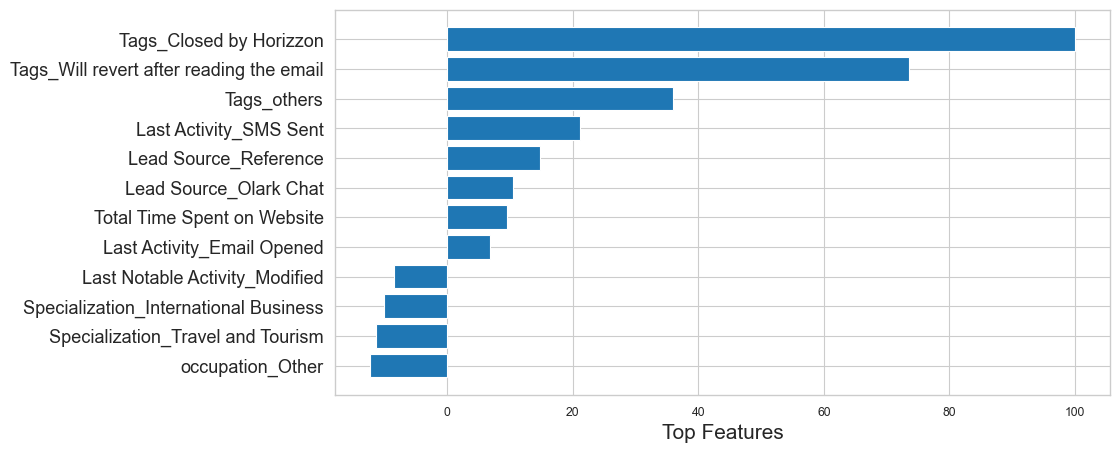

In [144]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

Twelve features were selected as the most significant in predicting the conversion:

Features having positive impact on conversion probability in decreasing order of imps basis model are

1. 'Tags_Closed by Horizzon'
2. 'Tags_Will revert after reading the email'
3. 'Tags_others'

But, features having positive impact on conversion probability in decreasing order of impact basis business intution are:
1. 'Tags_Closed by Horizzon'
2. 'Tags_Will revert after reading the emai
3. 'Last Activity_SMS Sent't: